In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/charl/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
 #sort the data by age"
df_sorted = df.sort_values(by='age'),
    # display the sorted data,
Print(df_sorted)

NameError: name 'data' is not defined

In [7]:
 #sort the data by age"
df_sorted = df.sort_values(by='age'),
    # display the sorted data,
Print(df_sorted)

NameError: name 'Print' is not defined

In [8]:
 #sort the data by age"
df_sorted = df.sort_values(by='age'),
    # display the sorted data,
print(df_sorted)

(      age     sex     bmi  children smoker     region      charges
1248   18  female  39.820         0     no  southeast   1633.96180
482    18  female  31.350         0     no  southeast   1622.18850
492    18  female  25.080         0     no  northeast   2196.47320
525    18  female  33.880         0     no  southeast  11482.63485
529    18    male  25.460         0     no  northeast   1708.00140
...   ...     ...     ...       ...    ...        ...          ...
398    64    male  25.600         2     no  southwest  14988.43200
335    64    male  34.500         0     no  southwest  13822.80300
378    64  female  30.115         3     no  northwest  16455.70785
1265   64    male  23.760         0    yes  southeast  26926.51440
635    64    male  38.190         0     no  northeast  14410.93210

[1338 rows x 7 columns],)


In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
sex_counts = df['sex'].value_counts()
print(sex_counts)

male      676
female    662
Name: sex, dtype: int64


In [13]:
# create a new column indicating whether the person has children or not
df['has_children'] = df['children'].apply(lambda x: 'yes' if x > 0 else 'no')

# group the data by gender and has_children
grouped = df.groupby(['sex', 'has_children'])

# count the number of people in each group
counts = grouped['children'].count()

# display the counts
print(counts)

sex     has_children
female  no              289
        yes             373
male    no              285
        yes             391
Name: children, dtype: int64


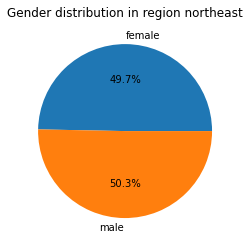

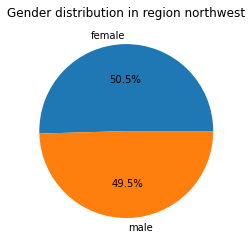

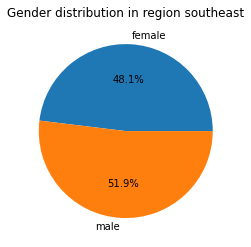

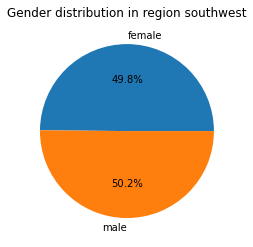

In [14]:
# Calculate the number of males and females in each region
gender_region_counts = df.groupby(['sex', 'region']).size().reset_index(name='counts')

# Plot the pie chart for each region
for region, region_data in gender_region_counts.groupby('region'):
    fig, ax = plt.subplots()
    ax.pie(region_data['counts'], labels=region_data['sex'], autopct='%1.1f%%')
    ax.set_title(f'Gender distribution in region {region}')
    plt.show()

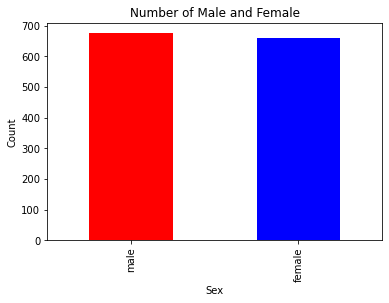

In [15]:
import matplotlib.pyplot as plt

# determine the number of males and females
sex_counts = df['sex'].value_counts()

# create a bar plot
sex_counts.plot(kind='bar', color=['red', 'blue'])

# add a title and labels for the x and y axes
plt.title('Number of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')

# display the plot
plt.show()

In [16]:
# group the data by gender and smoker status
grouped = df.groupby(['sex', 'smoker'])

# count the number of people in each group
counts = grouped['smoker'].count()

# display the counts
print(counts)

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64


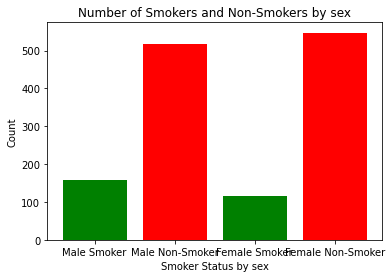

In [17]:
# group the data by smoker and sex columns
grouped = df.groupby(['smoker', 'sex']).size().reset_index(name='counts')

# create separate dataframes for male and female smokers and non-smokers
male_smokers = grouped[(grouped['smoker'] == 'yes') & (grouped['sex'] == 'male')]
male_non_smokers = grouped[(grouped['smoker'] == 'no') & (grouped['sex'] == 'male')]
female_smokers = grouped[(grouped['smoker'] == 'yes') & (grouped['sex'] == 'female')]
female_non_smokers = grouped[(grouped['smoker'] == 'no') & (grouped['sex'] == 'female')]

# plot the number of male and female smokers and non-smokers
plt.bar(['Male Smoker', 'Male Non-Smoker', 'Female Smoker', 'Female Non-Smoker'], 
        [male_smokers['counts'].values[0], male_non_smokers['counts'].values[0], 
         female_smokers['counts'].values[0], female_non_smokers['counts'].values[0]], 
        color=['green', 'red', 'green', 'red'])

# add a title and labels for the x and y axes
plt.title('Number of Smokers and Non-Smokers by sex')
plt.xlabel('Smoker Status by sex')
plt.ylabel('Count')

# display the plot
plt.show()


In [18]:
gender_region_counts = df.groupby(['sex', 'region']).size().reset_index(name='counts')

print(gender_region_counts)

      sex     region  counts
0  female  northeast     161
1  female  northwest     164
2  female  southeast     175
3  female  southwest     162
4    male  northeast     163
5    male  northwest     161
6    male  southeast     189
7    male  southwest     163


In [ ]:
#CONCLUSION
#The data includes details about a person's age, sex, BMI, how many children they have, if they smoke, and where they live together with charges.
#The count of males and females in each region is average
#There are roughly equal numbers of men and women, smokers and non-smokers in each region.
